In [1]:
import random
#Establecemos una semilla
random.seed(88)
#Generamos el número aleatorio
num_aleatorio = random.random()
print("Número ALeatorio:", num_aleatorio)

Número ALeatorio: 0.3974888769814575


In [2]:
import tensorflow as tf

2023-11-27 23:47:08.472547: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 23:47:08.472588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 23:47:08.473307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 23:47:08.478454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 23:47:09.118959: W tensorflow/compiler/tf2

In [3]:
#Instanciamos la clase generador aleatorio junto con el algoritmo
rng_1 = tf.random.Generator.from_seed(0,alg="philox")
#Elegimos la distribución unimforme
random_float = rng_1.uniform(shape=())
#Generamos un número aleatorio
print("Número Aleatorio:", random_float.numpy())

Número Aleatorio: 0.31179297


2023-11-27 23:47:09.805975: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 23:47:09.833758: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


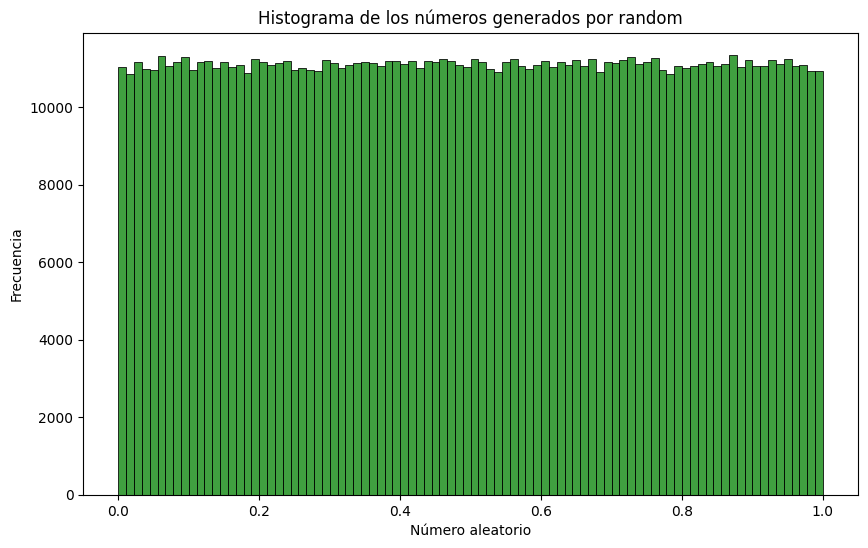

In [4]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
#Elegimos una semilla
random.seed(225)
#Generamos la cantidad de números solicitada
random_numbers = [random.random() for _ in range(1000000)]
#Creamos un histograma
plt.figure(figsize=(10, 6))
sns.histplot(random_numbers, bins=90, kde=False, color='green')
plt.title('Histograma de los números generados por random')
plt.xlabel('Número aleatorio')
plt.ylabel('Frecuencia')
plt.show()

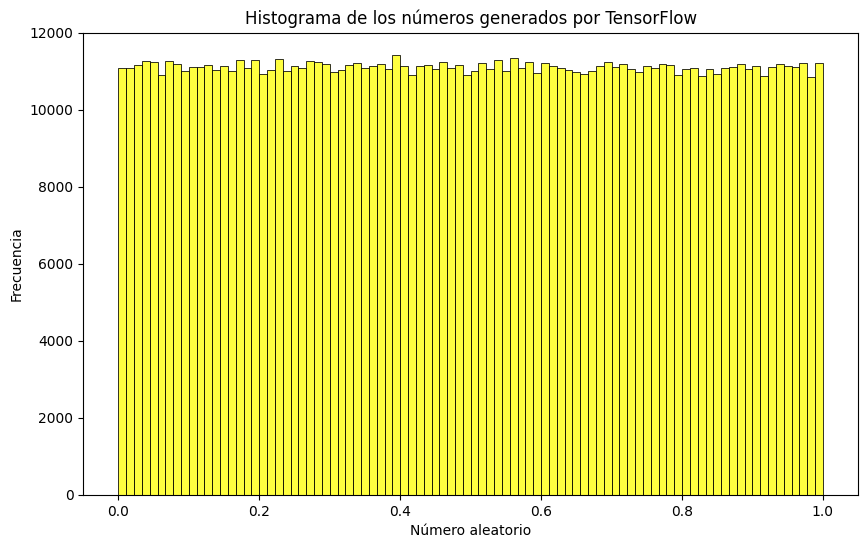

In [5]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seed for reproducibility
tf.random.set_seed(225)

# Generate random numbers using TensorFlow and Philox RNG
random_numbers = tf.random.uniform(shape=(1000000,), seed=42)

# Convert TensorFlow tensor to NumPy array for plotting
random_numbers_np = random_numbers.numpy()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(random_numbers_np, bins=90, kde=False, color='yellow')
plt.title('Histograma de los números generados por TensorFlow')
plt.xlabel('Número aleatorio')
plt.ylabel('Frecuencia')
plt.show()


### Parte II

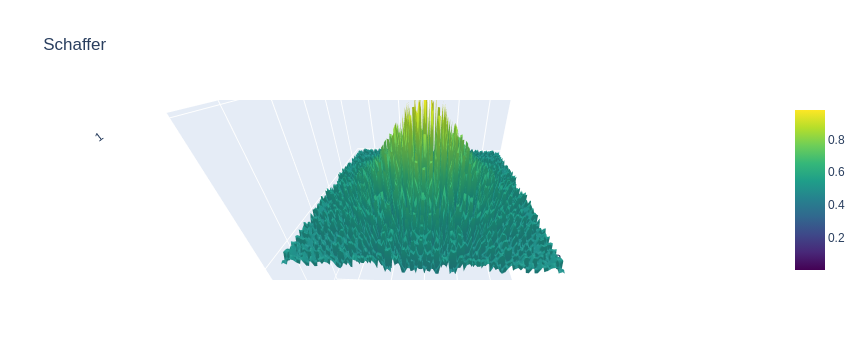

In [7]:
import numpy as np
import plotly.graph_objects as go
def schaffer2_function(xx):
    x1, x2 = xx
    fact1 = (np.sin(x1**2 - x2**2))**2 - 0.5
    fact2 = (1 + 0.001 * (x1**2 + x2**2))**2
    y = 0.5 + fact1 / fact2
    return y
x1_values = np.linspace(-50, 50, 100)
x2_values = np.linspace(-50, 50, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
z_values = schaffer2_function([x1_mesh, x2_mesh])
fig = go.Figure()
fig.add_trace(go.Surface(z=z_values, x=x1_mesh, y=x2_mesh, colorscale='Viridis'))
fig.update_layout(title='Schaffer',
                  scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='Y'))
fig.show()

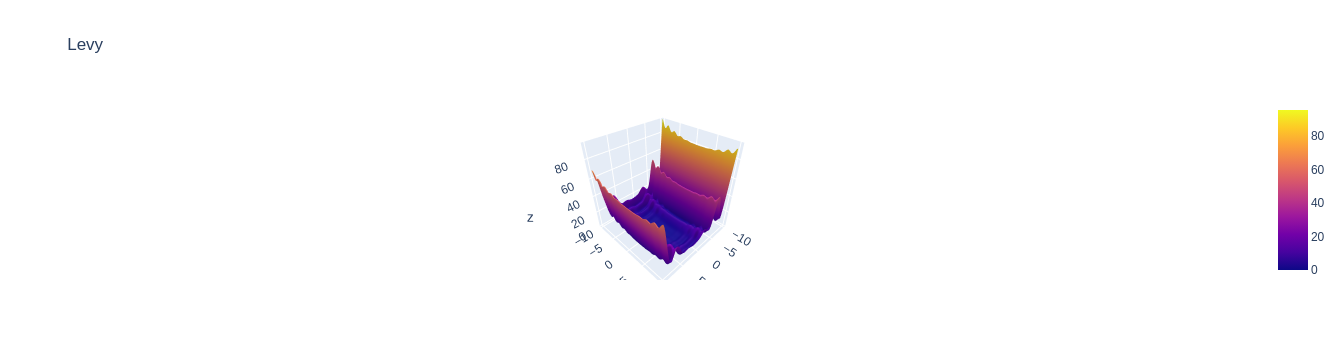

In [14]:
import numpy as np
import plotly.graph_objects as go
def levy_function(xx):
    d = len(xx)
    w = 1 + (np.array(xx) - 1) / 4

    term1 = (np.sin(np.pi * w[0]))**2
    term3 = (w[d-1] - 1)**2 * (1 + 1 * (np.sin(2 * np.pi * w[d-1]))**2)

    wi = w[:d-1]
    term2 = np.sum((wi - 1)**2 * (1 + 10 * (np.sin(np.pi * wi + 1))**2))

    y = term1 + term2 + term3
    return y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i, j] = levy_function([xx[i, j], yy[i, j]])
fig = go.Figure(data=[go.Surface(z=zz, x=xx, y=yy)])
fig.update_layout(scene=dict(zaxis=dict(range=[0, np.max(zz)])))
fig.update_layout(title='Levy', scene=dict(zaxis=dict(range=[0, np.max(zz)])))
fig.show()


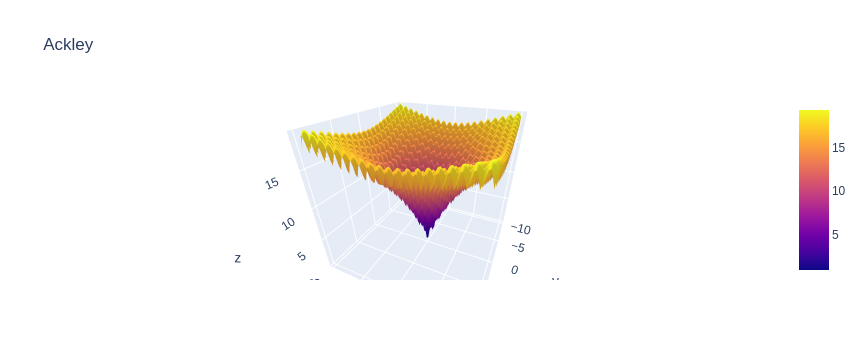

In [17]:
import numpy as np
import plotly.graph_objects as go

def ackley(xx, a=20, b=0.2, c=2 * np.pi):
    d = len(xx)
  
    sum1 = np.sum(np.array(xx)**2)
    sum2 = np.sum(np.cos(c * np.array(xx)))

    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)

    y = term1 + term2 + a + np.exp(1)
    return y

# Generate data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i, j] = ackley([xx[i, j], yy[i, j]])

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(z=zz, x=xx, y=yy)])
fig.update_layout(scene=dict(zaxis=dict(range=[0, np.max(zz)])))
fig.update_layout(title='Ackley', scene=dict(zaxis=dict(range=[0, np.max(zz)])))

# Show the plot
fig.show()
